In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np

df_dir = "../outputs/analyses"

# List of all model columns
model_columns = {
    'anthropic_claude-3-opus-20240229': "Claude 3 Opus",
    'openai_gpt-4o-2024-05-13': "GPT-4o",
    'openai_gpt-4-0613': "GPT-4 (0613)",
    'google_gemini-1.5-pro-preview-0409': "Gemini 1.5 Pro",
    'openai_gpt-4-1106-preview': "GPT-4 (1106)",
    'meta_llama-3-70b': "Llama 3 70b",
    'writer_palmyra-x-v3': "Palmrya X v3",
    'google_text-unicorn@001': "PaLM 2",
    'mistralai_mixtral-8x22b': "Mixtral 8x22b",
    'google_gemini-1.5-flash-preview-0514': "Gemini 1.5 Flash",
}

#List of all subjects
subjects = {
    #"All": "all",
    "Anatomy": "anatomy",
    "Astronomy": "astronomy",
    "Business ethics": "business_ethics",
    "Clinical knowledge": "clinical_knowledge",
    "College chemistry": "college_chemistry",
    "College computer_science": "college_computer_science",
    "College mathematics": "college_mathematics",
    "College medicine": "college_medicine",
    "College physics": "college_physics",
    "Conceptual physics:": "conceptual_physics",
    "Econometrics": "econometrics",
    "Electrical engineering": "electrical_engineering",
    "Formal logic": "formal_logic",
    "Global facts": "global_facts",
    "High school chemistry": "high_school_chemistry",
    "High school geography": "high_school_geography",
    "High school macroeconomics": "high_school_macroeconomics",
    "High school mathematics": "high_school_mathematics",
    "High school physics": "high_school_physics",
    "High school statistics": "high_school_statistics",
    "High school us history": "high_school_us_history",
    "Human aging": "human_aging",
    "Logical fallacies": "logical_fallacies",
    "Machine learning": "machine_learning",
    "Miscellaneous": "miscellaneous",
    "Philosophy": "philosophy",
    "Professional accounting": "professional_accounting",
    "Professional law": "professional_law",
    "Public relations": "public_relations",
    "Virology": "virology",
}

#List of models we used for fig 5
model_top_columns = {
    'anthropic_claude-3-opus-20240229': "Claude 3 Opus",
    'openai_gpt-4o-2024-05-13': "GPT-4o",
    'meta_llama-3-70b': "Llama 3 70b",
}

#List of subject we used for fig 5
subjects_top_v2 = {
    "Virology": "virology",
    "Logical Fallacies": "logical_fallacies",
    "College Chemistry": "college_chemistry",
    "Professional Law": "professional_law",
    "Business Ethics": "business_ethics",
    "Formal Logic": "formal_logic",
    "Human aging": "human_aging",
}

In [ ]:
#calculate marco average
df_marco = None

list_dfs = []

for subject_name, subject_id in subjects.items():
    df = pd.read_csv(f"{df_dir}/{subject_id}.csv")
    df['groundtruth_answer'] = df['groundtruth_answer'].apply(lambda x: chr(65 + x))

    for model in model_columns:
        df[model + '_correct'] = df['groundtruth_answer'] == df[model]

    grouped_em = df.groupby('binary_error_type').agg({f'{model}_correct': 'mean' for model in model_columns})
    grouped_em.index = ['OK' if idx == 0 else 'Not OK' for idx in grouped_em.index]
    overall_em = df[[f'{model}_correct' for model in model_columns]].mean()

    overall_em_df = pd.DataFrame([overall_em], index=['Overall'])
    final_df = pd.concat([overall_em_df, grouped_em], keys=['Overall', 'Grouped'])
    if df_marco is None:
        df_marco = final_df
    else:
        df_marco = pd.concat([df_marco,final_df])

    final_df_tmp = final_df.reset_index(drop=True)
    final_df_tmp.index = ['Overall' if idx == 0 else 'OK' if idx == 1 else "Not OK" for idx in final_df_tmp.index]
    list_dfs.append(final_df_tmp)

    final_df_transposed = final_df.T
    final_df_transposed['combined'] = final_df_transposed.apply(lambda x: ' | '.join(x.astype(str)), axis=1)
    #final_df_transposed.T.to_csv(f"{df_dir}/{subject_id}_em_per_error.csv")

df_marco = df_marco.groupby(df_marco.index, sort=False).mean()
df_marco_transposed = df_marco.round(2).T
df_marco_transposed['combined'] = df_marco_transposed.apply(lambda x: ' | '.join(x.astype(str)), axis=1)
#df_marco_transposed.T.to_csv(f"{df_dir}/all_em_per_error.csv")

df_marco_tmp = df_marco.reset_index(drop=True)
df_marco_tmp.index = ['Overall' if idx == 0 else 'OK' if idx == 1 else "Not OK" for idx in df_marco_tmp.index]
list_dfs = [df_marco_tmp] + list_dfs

combined_df = pd.concat(list_dfs, keys=["All"] + list(subjects.keys()), names=['Subject', 'Condition'])
#combined_df.to_csv(f"{df_dir}/concat_all_subjects_EM_per_error.csv")

In [ ]:
combined_df

anthropic_claude-3-opus-20240229_correct  \
Subject          Condition                                             
All              Overall                                    0.787667   
                 OK                                         0.818812   
                 Not OK                                     0.585013   
Anatomy          Overall                                    0.790000   
                 OK                                         0.797980   
...                                                              ...   
Public relations OK                                         0.857143   
                 Not OK                                     0.555556   
Virology         Overall                                    0.540000   
                 OK                                         0.883721   
                 Not OK                                     0.280702   

                            openai_gpt-4o-2024-05-13_correct  \
Subject          Condition                                     
All              Overall                            0.781000   
                 OK                                 0.814376   
                 Not OK                             0.501565   
Anatomy          Overall                            0.910000   
                 OK                                 0.919192   
...                                                      ...   
Public relations OK                                 0.868132   
                 Not OK                             0.444444   
Virology         Overall                            0.560000   
                 OK                                 0.906977   
                 Not OK                             0.298246   

                            openai_gpt-4-0613_correct  \
Subject          Condition                              
All              Overall                     0.755667   
                 OK                          0.791868   
                 Not OK                      0.458105   
Anatomy          Overall                     0.810000   
                 OK                          0.818182   
...                                               ...   
Public relations OK                          0.802198   
                 Not OK                      0.333333   
Virology         Overall                     0.560000   
                 OK                          0.883721   
                 Not OK                      0.315789   

                            google_gemini-1.5-pro-preview-0409_correct  \
Subject          Condition                                               
All              Overall                                      0.766667   
                 OK                                           0.796234   
                 Not OK                                       0.467993   
Anatomy          Overall                                      0.770000   
                 OK                                           0.777778   
...                                                                ...   
Public relations OK                                           0.802198   
                 Not OK                                       0.444444   
Virology         Overall                                      0.550000   
                 OK                                           0.837209   
                 Not OK                                       0.333333   

                            openai_gpt-4-1106-preview_correct  \
Subject          Condition                                      
All              Overall                             0.713333   
                 OK                                  0.748184   
                 Not OK                              0.445562   
Anatomy          Overall                             0.800000   
                 OK                                  0.808081   
...                                                       ...   
Public relations OK              

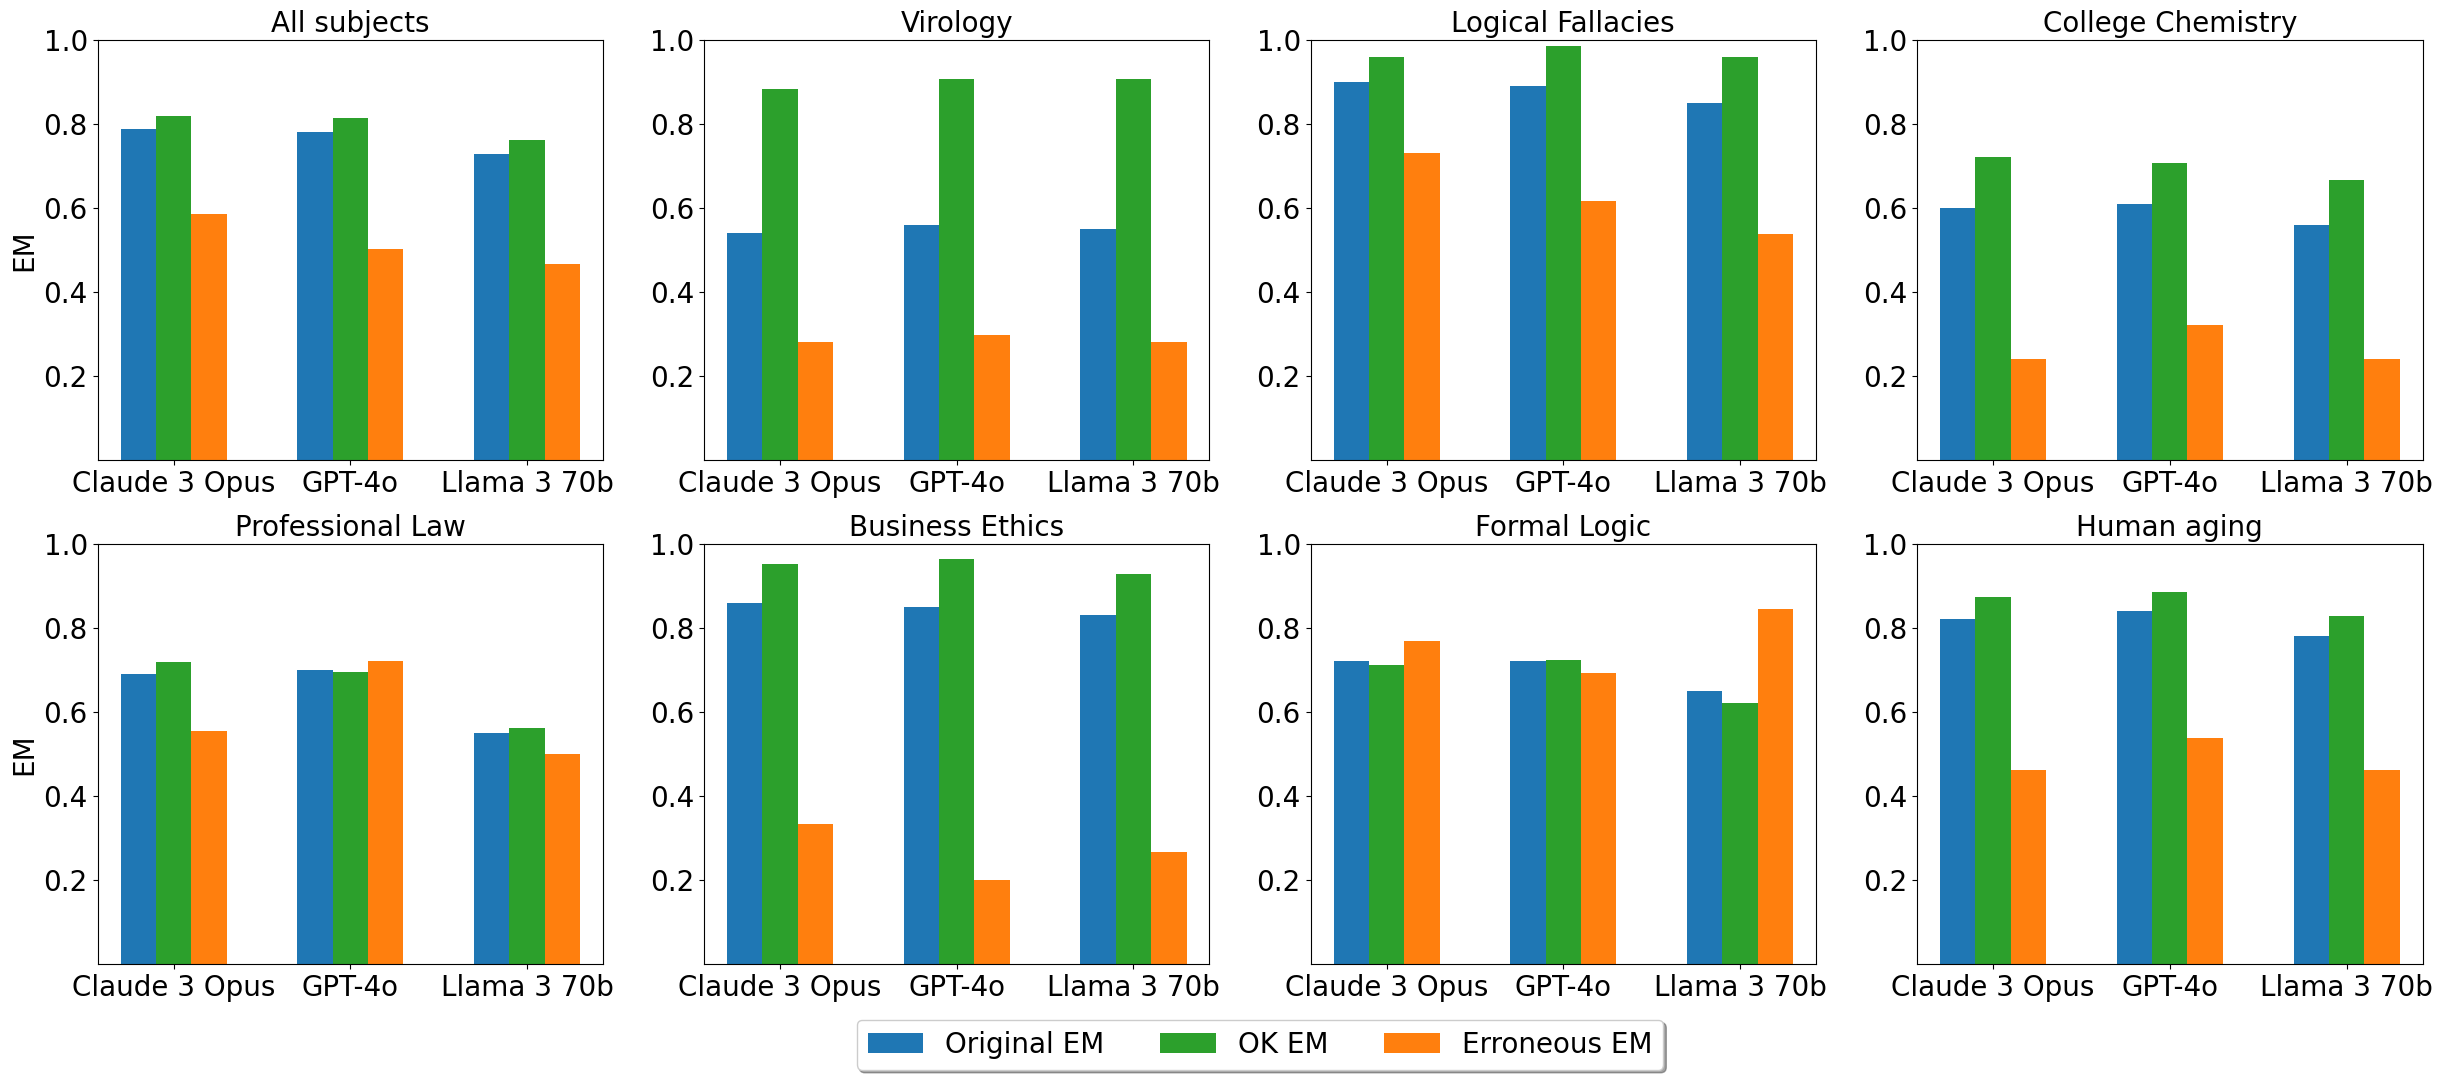

In [ ]:
with plt.rc_context({'font.size': 20, 'axes.titlesize': 20, 'axes.labelsize': 20}):
    fig, axs = plt.subplots(2, 4, figsize=(30, 12))

    df_marco_plot = df_marco[[f'{model}_correct' for model in model_top_columns]].reset_index(drop=True)

    #fig, ax = plt.subplots(figsize=(5, 3))

    index = np.arange(len(model_top_columns))
    bar_width = 0.2

    overall_bars = axs[0, 0].bar(index, df_marco_plot.loc[0], bar_width, label='Original EM', color='#1f77b4')

    error0_bars = axs[0, 0].bar(index + bar_width, df_marco_plot.loc[1], bar_width, label='OK EM', color='#2ca02c')
    error1_bars = axs[0, 0].bar(index + 2 * bar_width, df_marco_plot.loc[2], bar_width, label='Erroneous EM', color='#ff7f0e')

    #axs[0, 0].set_xlabel(subject_name)
    axs[0, 0].set_ylabel('EM')
    axs[0, 0].set_title("All subjects")
    axs[0, 0].set_xticks(index + bar_width)
    axs[0, 0].set_xticklabels([model_top_columns[model] for model in model_top_columns])
    axs[0, 0].set_ylim(0, 1.0)
    #axs[0, 0].legend()
    axs[0, 0].legend(loc='upper center', bbox_to_anchor=(2.3, -1.3), shadow=True, ncol=3)

    yticks = axs[0, 0].get_yticks()
    yticks = yticks[yticks != 0]
    axs[0, 0].set_yticks(yticks)

    for sid, (subject_name, subject_id) in enumerate(subjects_top_v2.items()):
        plot_id = sid + 1
        df = pd.read_csv(f"{df_dir}/{subject_id}.csv")
        df['groundtruth_answer'] = df['groundtruth_answer'].apply(lambda x: chr(65 + x))

        for model in model_top_columns:
            df[model + '_correct'] = df['groundtruth_answer'] == df[model]

        grouped_em = df.groupby('binary_error_type').agg({f'{model}_correct': 'mean' for model in model_top_columns})
        overall_em = df[[f'{model}_correct' for model in model_top_columns]].mean()

        index = np.arange(len(model_top_columns))
        bar_width = 0.2

        overall_bars = axs[int(plot_id/4), (plot_id%4)].bar(index, overall_em, bar_width, label='Original EM', color='#1f77b4')

        error0_bars = axs[int(plot_id/4), (plot_id%4)].bar(index + bar_width, grouped_em.loc[0], bar_width, label='OK EM', color='#2ca02c')
        error1_bars = axs[int(plot_id/4), (plot_id%4)].bar(index + 2 * bar_width, grouped_em.loc[1], bar_width, label='Erroneous EM', color='#ff7f0e')

        #axs[int(plot_id/4), (plot_id%4)].set_xlabel(subject_name)
        if (plot_id%4) == 0:
            axs[int(plot_id/4), (plot_id%4)].set_ylabel('EM')

        axs[int(plot_id/4), (plot_id%4)].set_title(subject_name)
        axs[int(plot_id/4), (plot_id%4)].set_xticks(index + bar_width)
        axs[int(plot_id/4), (plot_id%4)].set_xticklabels([model_top_columns[model] for model in model_top_columns])
        axs[int(plot_id/4), (plot_id%4)].set_ylim(0, 1.0)
        axs[int(plot_id/4), (plot_id%4)].set_yticks(yticks)

    #plt.savefig('../outputs/analyses/mini-mmlu-em-error-type-All-top7-models_v2.pdf', format='pdf', bbox_inches='tight')
    #plt.tight_layout()
    # plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()